In [1]:
import json
from pathlib import Path


def load_model_data(model_name: str, json_dir: str) -> dict:
    model_data = {model_name: {}}
    
    json_files = list(Path(json_dir).glob('*.json'))

    for json_path in json_files:
        with open(json_path) as f:
            data = json.load(f)
            model_data[model_name].update(data)
    
    return model_data


model1_results_path = '/home/locke/ManifoldRG/MultiNet/src/eval/profiling/gpt_results/final_zero_shot_results'
model2_results_path = '/home/locke/ManifoldRG/MultiNet/src/eval/profiling/jat/results/final_zero_shot_results'
model3_results_path = '/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/results'

model1_data = load_model_data('gpt', model1_results_path)
model2_data = load_model_data('jat', model2_results_path)
model3_data = load_model_data('openvla', model3_results_path)

print(f"gpt dataset count: {len(model1_data['gpt'])}")
print(f"jat dataset count: {len(model2_data['jat'])}")
print(f"openvla dataset count: {len(model3_data['openvla'])}")



gpt dataset count: 22
jat dataset count: 53
openvla dataset count: 20


In [2]:
datasets = set(model1_data['gpt'].keys()) & set(model2_data['jat'].keys()) & set(model3_data['openvla'].keys())
print(f"overlapping dataset count: {len(datasets)}")


overlapping dataset count: 20


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datasets_in_mm = {
    'utokyo_pr2_opening_fridge_converted_externally_to_rlds',
    'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds',
    'ucsd_kitchen_dataset_converted_externally_to_rlds'
}

datasets_in_meter = datasets - datasets_in_mm

data_in_meter = {
    'Dataset': [],
    'Avg Dataset AMSE': [],
    'Model': []
}

data_in_mm = {
    'Dataset': [],
    'Avg Dataset AMSE': [],
    'Model': []
}


for dataset in datasets_in_meter:
    data_in_meter['Dataset'].extend([dataset] * 3)
    data_in_meter['Avg Dataset AMSE'].extend([
        model1_data['gpt'][dataset]['avg_dataset_amse'],
        model2_data['jat'][dataset]['avg_dataset_amse'],
        model3_data['openvla'][dataset]['avg_dataset_amse']
    ])
    data_in_meter['Model'].extend(['gpt', 'jat', 'openvla'])


for dataset in datasets_in_mm:
    data_in_mm['Dataset'].extend([dataset] * 3)
    data_in_mm['Avg Dataset AMSE'].extend([
        model1_data['gpt'][dataset]['avg_dataset_amse'],
        model2_data['jat'][dataset]['avg_dataset_amse'],
        model3_data['openvla'][dataset]['avg_dataset_amse']
    ])
    data_in_mm['Model'].extend(['gpt', 'jat', 'openvla'])

dataset_name_mapping = {
        'jaco_play': 'Jaco Play',
        'berkeley_cable_routing': 'Berkeley Cable Routing',
        'nyu_door_opening_surprising_effectiveness': 'NYU VINN',
        'viola': 'Austin Viola',
        'berkeley_autolab_ur5': 'Berkeley Autolab UR5',
        'toto': 'TOTO Benchmark',
        'columbia_cairlab_pusht_real': 'Columbia PushT',
        "nyu_rot_dataset_converted_externally_to_rlds": 'NYU ROT',
        'stanford_hydra_dataset_converted_externally_to_rlds': 'Stanford HYDRA',
        'ucsd_kitchen_dataset_converted_externally_to_rlds': 'UCSD Kitchen',
        'ucsd_pick_and_place_dataset_converted_externally_to_rlds': 'UCSD Pick Place',
        "usc_cloth_sim_converted_externally_to_rlds": 'USC Cloth Sim',
        "utokyo_pr2_opening_fridge_converted_externally_to_rlds": 'UTokyo PR2 Fridge',
        'utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds': 'UTokyo PR2 Tabletop',
        'utokyo_xarm_pick_and_place_converted_externally_to_rlds': 'UTokyo xArm PickPlace',
        'stanford_mask_vit_converted_externally_to_rlds': 'Stanford Mask VIT',
        'eth_agent_affordances': 'ETH Agent Affordances',
        'imperialcollege_sawyer_wrist_cam': 'Imperial Wrist Cam',
        'conq_hose_manipulation': 'ConqHose',
        'plex_robosuite': 'Plex Robosuite',
}

for dataset in data_in_meter['Dataset']:
    data_in_meter['Dataset'] = [dataset_name_mapping[dataset] if dataset in dataset_name_mapping else dataset for dataset in data_in_meter['Dataset']]

for dataset in data_in_mm['Dataset']:
    data_in_mm['Dataset'] = [dataset_name_mapping[dataset] if dataset in dataset_name_mapping else dataset for dataset in data_in_mm['Dataset']]

df_in_meter = pd.DataFrame(data_in_meter)
df_in_mm = pd.DataFrame(data_in_mm)

print(df_in_meter)
print(df_in_mm)



                   Dataset  Avg Dataset AMSE    Model
0           TOTO Benchmark          0.361108      gpt
1           TOTO Benchmark          1.334640      jat
2           TOTO Benchmark          0.005927  openvla
3       Imperial Wrist Cam          0.073153      gpt
4       Imperial Wrist Cam          0.117524      jat
5       Imperial Wrist Cam          0.075033  openvla
6                 ConqHose          0.127136      gpt
7                 ConqHose          1.373426      jat
8                 ConqHose          0.084277  openvla
9     Berkeley Autolab UR5          0.073811      gpt
10    Berkeley Autolab UR5          0.039866      jat
11    Berkeley Autolab UR5          0.142427  openvla
12   ETH Agent Affordances          1.168235      gpt
13   ETH Agent Affordances          1.073129      jat
14   ETH Agent Affordances          0.113991  openvla
15       Stanford Mask VIT          0.645233      gpt
16       Stanford Mask VIT          1.059974      jat
17       Stanford Mask VIT  

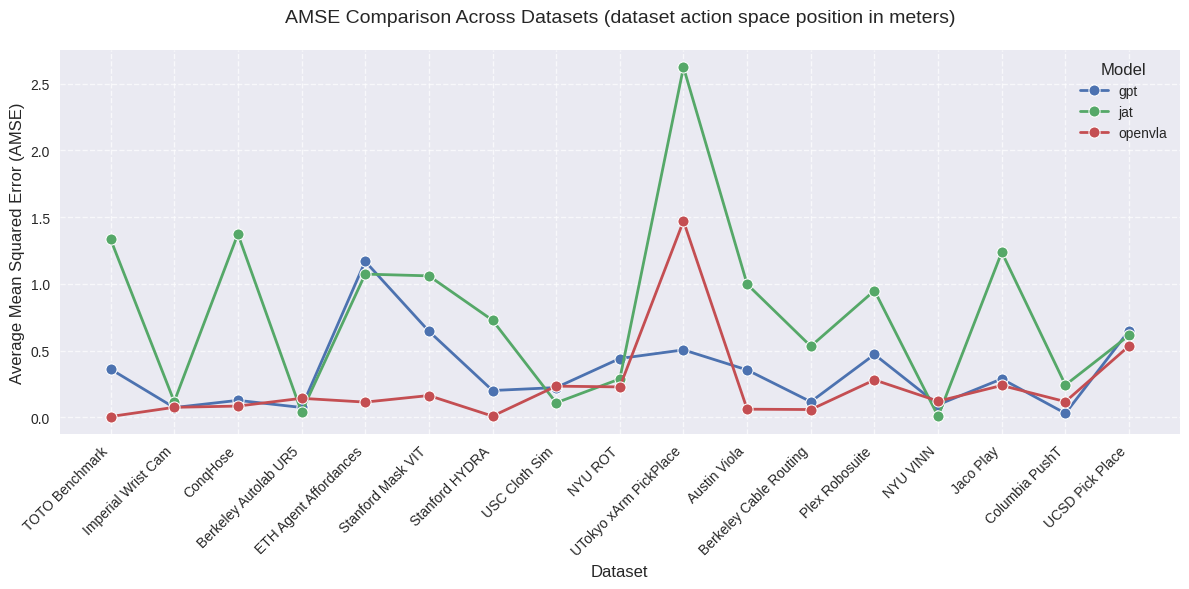

In [7]:
plt.style.use(['seaborn-v0_8', 'seaborn-v0_8-darkgrid'])

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_in_meter,
    x='Dataset',
    y='Avg Dataset AMSE',
    hue='Model',
    marker='o',
    markersize=8,
    linewidth=2
)

plt.title('AMSE Comparison Across Datasets (dataset action space position in meters)', fontsize=14, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average Mean Squared Error (AMSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

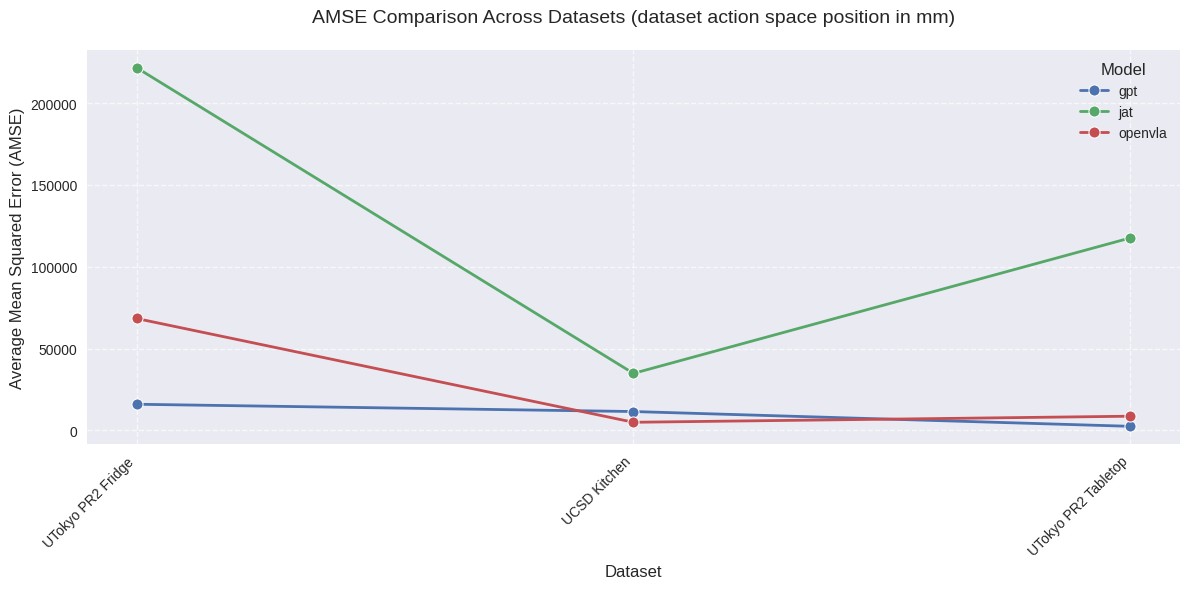

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_in_mm,
    x='Dataset',
    y='Avg Dataset AMSE',
    hue='Model',
    marker='o',
    markersize=8,
    linewidth=2
)
plt.title('AMSE Comparison Across Datasets (dataset action space position in mm)', fontsize=14, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average Mean Squared Error (AMSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
import json
import numpy as np


statistics_path = '/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/data/dataset_statistics.json'
with open(statistics_path) as f:
    statistics = json.load(f)

datasets_to_check = [
    'berkeley_autolab_ur5',
    'nyu_door_opening_surprising_effectiveness',
    'imperialcollege_sawyer_wrist_cam',
    'toto',
    'viola',
    'utokyo_xarm_pick_and_place_converted_externally_to_rlds',
    'conq_hose_manipulation',
    'eth_agent_affordances',
]

def get_average_min_max_range_in_action(min: list, max: list) -> float:
    return np.mean([x - y for x, y in zip(max, min)])

for dataset in datasets_to_check:
    print(f"{dataset}: {get_average_min_max_range_in_action(statistics[dataset]['action']['min'], statistics[dataset]['action']['max'])}")

berkeley_autolab_ur5: 0.21714285973991668
nyu_door_opening_surprising_effectiveness: 0.3922820309443133
imperialcollege_sawyer_wrist_cam: 0.25219027059418814
toto: 1.8213336755122458
viola: 1.3197448977402277
utokyo_xarm_pick_and_place_converted_externally_to_rlds: 1.5622795607362474
conq_hose_manipulation: 1.2091239818504878
eth_agent_affordances: 1.4527708377156938


In [11]:
df_in_meter = pd.DataFrame(data_in_meter)
df_in_mm = pd.DataFrame(data_in_mm)
df_in_meter_no_jat = df_in_meter[df_in_meter['Model'] != 'jat']
df_in_mm_no_jat = df_in_mm[df_in_mm['Model'] != 'jat']


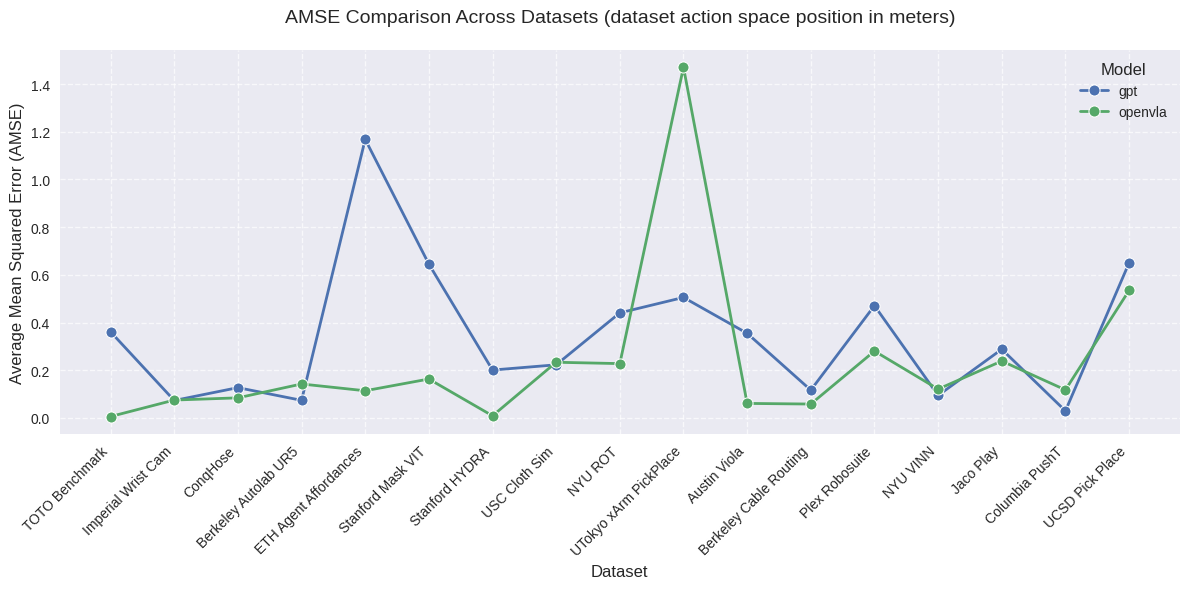

In [12]:
plt.style.use(['seaborn-v0_8', 'seaborn-v0_8-darkgrid'])

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_in_meter_no_jat,
    x='Dataset',
    y='Avg Dataset AMSE',
    hue='Model',
    marker='o',
    markersize=8,
    linewidth=2
)

plt.title('AMSE Comparison Across Datasets (dataset action space position in meters)', fontsize=14, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average Mean Squared Error (AMSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

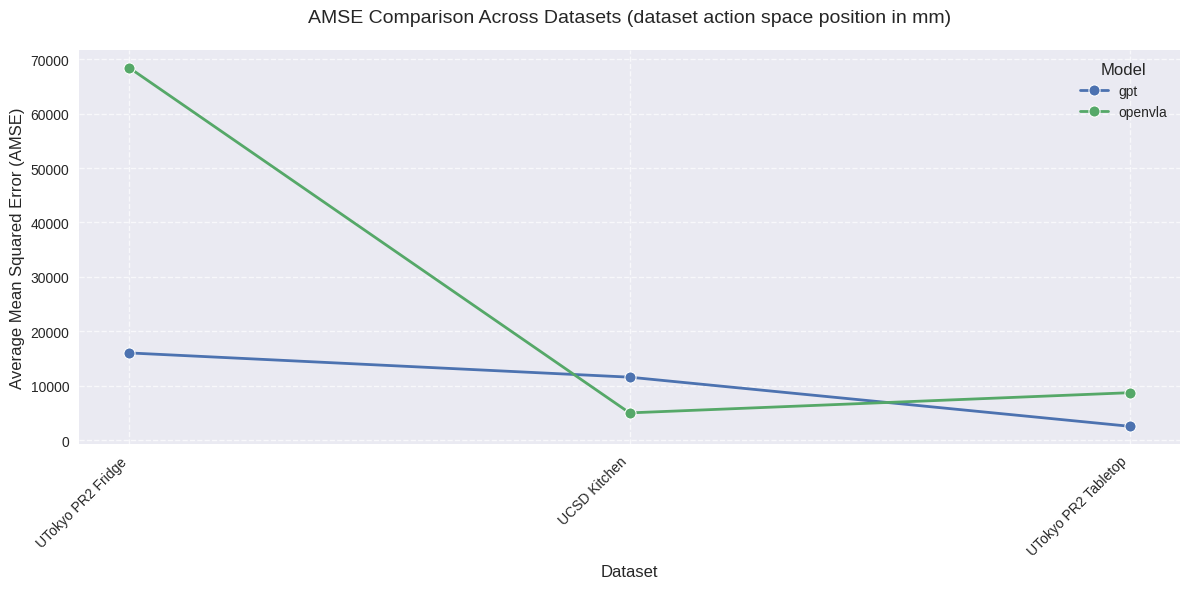

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_in_mm_no_jat,
    x='Dataset',
    y='Avg Dataset AMSE',
    hue='Model',
    marker='o',
    markersize=8,
    linewidth=2
)
plt.title('AMSE Comparison Across Datasets (dataset action space position in mm)', fontsize=14, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Average Mean Squared Error (AMSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()